Import dependencies

In [41]:
import pandas as pd

Read dataset from `jennybc/gapminder`

In [42]:
url = 'https://raw.githubusercontent.com/jennybc/gapminder/main/inst/extdata/gapminder.tsv'
df = pd.read_csv(url, sep='\t')

df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [43]:
type(df)

pandas.core.frame.DataFrame

In [44]:
# get the number of rows and columns
df.shape

(1704, 6)

In [45]:
# get column names
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [46]:
# get the dtype of each columns
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


## Subsetting

### Subsetting Columns

In [48]:
country_df = df['country']

In [49]:
country_df.head()

0    Afghanistan
1    Afghanistan
2    Afghanistan
3    Afghanistan
4    Afghanistan
Name: country, dtype: object

In [50]:
country_df.tail()

1699    Zimbabwe
1700    Zimbabwe
1701    Zimbabwe
1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object

In [51]:
subset = df[['country', 'continent', 'year']]

In [52]:
subset.head()

,country,continent,year
0,Afghanistan,Asia,1952
1,Afghanistan,Asia,1957
2,Afghanistan,Asia,1962
3,Afghanistan,Asia,1967
4,Afghanistan,Asia,1972


In [53]:
subset.tail()

,country,continent,year
1699,Zimbabwe,Africa,1987
1700,Zimbabwe,Africa,1992
1701,Zimbabwe,Africa,1997
1702,Zimbabwe,Africa,2002
1703,Zimbabwe,Africa,2007


### Subsetting Rows

#### by Index Label: `loc`

In [54]:
df.loc[0]

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [55]:
df.loc[99]

country      Bangladesh
continent          Asia
year               1967
lifeExp          43.453
pop            62821884
gdpPercap    721.186086
Name: 99, dtype: object

In [56]:
# Last row
df.loc[df.shape[0] - 1]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

In [57]:
df.tail(n=1)

,country,continent,year,lifeExp,pop,gdpPercap
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


Results of `tail()` and `loc` has different data type

In [58]:
type(df.loc[0])

pandas.core.series.Series

In [59]:
type(df.head(n=1))

pandas.core.frame.DataFrame

#### Subsetting Multiple Rows

In [60]:
df.loc[[0, 99, 999]]

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
99,Bangladesh,Asia,1967,43.453,62821884,721.186086
999,Mongolia,Asia,1967,51.253,1149500,1226.041130


#### by Row Number: `iloc`

In [61]:
df.iloc[1]

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object

In [62]:
# Here we can pass -1 to get the last row--something we couldn't do with `loc`
df.iloc[-1]

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

### Mixed Subsetting

Python slicing syntax uses a colon `:`. Just `:` refers to everything

In [63]:
# subset columns with loc
# note the position of the colon
# it is used to select all rows

subset = df.loc[:, ['year', 'pop']]
subset.head()

,year,pop
0,1952,8425333
1,1957,9240934
2,1962,10267083
3,1967,11537966
4,1972,13079460


In [64]:
# setset columns with iloc
# iloc will allow us to use integers
# -1 will select the last column
subset = df.iloc[:, [2, 4, -1]]
subset.head()

,year,pop,gdpPercap
0,1952,8425333,779.445314
1,1957,9240934,820.853030
2,1962,10267083,853.100710
3,1967,11537966,836.197138
4,1972,13079460,739.981106


Subsetting columns by range

In [65]:
small_range = list(range(5))
subset = df.iloc[:, small_range]
subset.head()

,country,continent,year,lifeExp,pop
0,Afghanistan,Asia,1952,28.801,8425333
1,Afghanistan,Asia,1957,30.332,9240934
2,Afghanistan,Asia,1962,31.997,10267083
3,Afghanistan,Asia,1967,34.020,11537966
4,Afghanistan,Asia,1972,36.088,13079460


Subsetting rows AND columns!!

In [66]:
# 43th row and 'country' column
df.loc[42, 'country']

'Angola'

In [67]:
# 43rd row and 1st column
df.iloc[42, 0]

'Angola'

Subsetting multiple rows and columns

In [68]:
# get the 1st, 100th, and 1000th rows
# from the 1st, 4th, aand 6th columns

df.iloc[[0, 99, 999], [0, 3, 5]]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [69]:
# alternative: use column names
df.loc[[0, 99, 999], ['country', 'lifeExp', 'gdpPercap']]

,country,lifeExp,gdpPercap
0,Afghanistan,28.801,779.445314
99,Bangladesh,43.453,721.186086
999,Mongolia,51.253,1226.041130


In [70]:
# we could also use slicing syntax on the row portion of the loc/iloc attributes
df.loc[10:13, ['country', 'lifeExp', 'gdpPercap']]

,country,lifeExp,gdpPercap
10,Afghanistan,42.129,726.734055
11,Afghanistan,43.828,974.580338
12,Albania,55.230,1601.056136
13,Albania,59.280,1942.284244


# Grouped and Aggregated calculations

In [71]:
df.head(n=10)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
6,Afghanistan,Asia,1982,39.854,12881816,978.011439
7,Afghanistan,Asia,1987,40.822,13867957,852.395945
8,Afghanistan,Asia,1992,41.674,16317921,649.341395
9,Afghanistan,Asia,1997,41.763,22227415,635.341351


Grouped Means

In [72]:
# For each year in our dât, what ứa the average life expectancy?
# To answer this question,
# we need to split our data in parts by year; (.groupby('year'))
# then we get the 'lifeExp' column and calculate the mean ['lifeExp'].mean()
df.groupby('year')['lifeExp'].mean()

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [73]:
grouped_year_df = df.groupby('year')
type(grouped_year_df)

pandas.core.groupby.generic.DataFrameGroupBy

In [74]:
grouped_year_df

In [75]:
grouped_year_df_lifeExp = grouped_year_df['lifeExp']
type(grouped_year_df_lifeExp)

pandas.core.groupby.generic.SeriesGroupBy

In [76]:
grouped_year_df_lifeExp

In [77]:
mean_lifeExp_by_year = grouped_year_df_lifeExp.mean()
mean_lifeExp_by_year

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [78]:
multi_group_var = df.\
    groupby(['year', 'continent'])\
        [['lifeExp', 'gdpPercap']].\
            mean()

multi_group_var

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [80]:
flat = multi_group_var.reset_index()
flat.head(15)

,year,continent,lifeExp,gdpPercap
0,1952,Africa,39.135500,1252.572466
1,1952,Americas,53.279840,4079.062552
2,1952,Asia,46.314394,5195.484004
3,1952,Europe,64.408500,5661.057435
4,1952,Oceania,69.255000,10298.085650
5,1957,Africa,41.266346,1385.236062
6,1957,Americas,55.960280,4616.043733
7,1957,Asia,49.318544,5787.732940
8,1957,Europe,66.703067,6963.012816
9,1957,Oceania,70.295000,11598.522455


Grouped Frequency Counts

In [81]:
# use the nunique (number unique)
# to calculate the number of unique values in a series
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

In [83]:
# What do you get if you use `value_counts` instead of `nunique`?
df.groupby('continent')['country'].value_counts()

# We get the count for each country, grouped by continent

continent  country       
Africa     Algeria           12
           Angola            12
           Benin             12
           Botswana          12
           Burkina Faso      12
                             ..
Europe     Switzerland       12
           Turkey            12
           United Kingdom    12
Oceania    Australia         12
           New Zealand       12
Name: country, Length: 142, dtype: int64

# Basic Plot

In [84]:
global_yearly_life_expectancy = df.groupby('year')['lifeExp'].mean()
global_yearly_life_expectancy

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

<AxesSubplot:xlabel='year'>

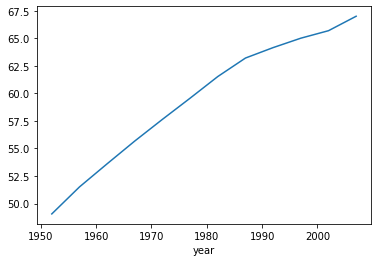

In [85]:
global_yearly_life_expectancy.plot()